# Centralidades de grado y eigenvector


Cargamos las librerías


In [39]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import matplotlib.cm as cm
import matplotlib.colors as mcolors
from IPython.display import display

Vamos a analizar las centralidades de varios ejemplos


# Ejemplo 1


Hacemos la red del primer ejemplo:


In [40]:
G = nx.Graph()

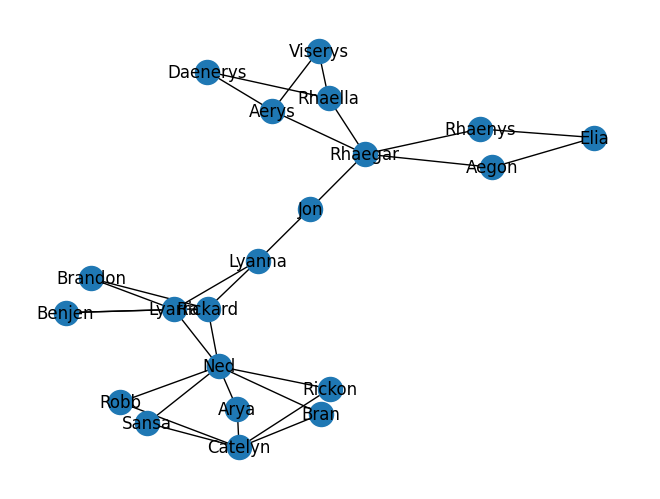

In [41]:
stark_targaryen = ['Rickard', 'Lyarra', 'Aerys', 'Rhaella', 'Catelyn', 'Ned', 'Lyanna', 'Rhaegar', 'Elia', 'Viserys', 'Daenerys',
                   'Brandon', 'Benjen', 'Robb', 'Sansa', 'Arya', 'Bran', 'Rickon', 'Rhaenys', 'Aegon', 'Jon']

parents = [('Rickard', 'Ned'), ('Rickard', 'Lyanna'), ('Rickard', 'Brandon'), ('Rickard', 'Benjen'),
           ('Lyarra', 'Ned'), ('Lyarra', 'Lyanna'), ('Lyarra',
                                                     'Brandon'), ('Lyarra', 'Benjen'),
           ('Aerys', 'Rhaegar'), ('Aerys', 'Viserys'), ('Aerys', 'Daenerys'),
           ('Rhaella', 'Rhaegar'), ('Rhaella', 'Viserys'), ('Rhaella', 'Daenerys'),
           ('Catelyn', 'Robb'), ('Catelyn', 'Sansa'), ('Catelyn',
                                                       'Arya'), ('Catelyn', 'Bran'), ('Catelyn', 'Rickon'),
           ('Ned', 'Robb'), ('Ned', 'Sansa'), ('Ned',
                                               'Arya'), ('Ned', 'Bran'), ('Ned', 'Rickon'),
           ('Rhaegar', 'Rhaenys'), ('Rhaegar',
                                    'Aegon'), ('Elia', 'Rhaenys'), ('Elia', 'Aegon'),
           ('Lyanna', 'Jon'), ('Rhaegar', 'Jon')]

G.add_nodes_from(stark_targaryen)
G.add_edges_from(parents)

layout = nx.kamada_kawai_layout(G)
nx.draw(G, layout, with_labels=True)

### Centralidad de grado


Usamos la función "degre_centrality" para calcular la centralidad de grado de los nodos. Para redes dirigidas se puede usar "in_degree_centrality" y "out_degree_centrality". Nos da un diccionario con cada una de las centralidades, las cuales están normalizadas (se divide por el máximo grado posible en la red).


In [42]:
deg_centralidades = nx.degree_centrality(G)

Podemos ordenar las centralidades de mayor a menor, para saber cuáles son los vértices más centrales.


In [43]:
dict(sorted(deg_centralidades.items(), key=lambda item: item[1], reverse=True))

{'Ned': 0.35000000000000003,
 'Catelyn': 0.25,
 'Rhaegar': 0.25,
 'Rickard': 0.2,
 'Lyarra': 0.2,
 'Aerys': 0.15000000000000002,
 'Rhaella': 0.15000000000000002,
 'Lyanna': 0.15000000000000002,
 'Elia': 0.1,
 'Viserys': 0.1,
 'Daenerys': 0.1,
 'Brandon': 0.1,
 'Benjen': 0.1,
 'Robb': 0.1,
 'Sansa': 0.1,
 'Arya': 0.1,
 'Bran': 0.1,
 'Rickon': 0.1,
 'Rhaenys': 0.1,
 'Aegon': 0.1,
 'Jon': 0.1}

### Centralidad de eigenvector


Hacemos lo mismo con la centralidad de eigenvector, usando la función "eigenvector_centrality" obtenemos un diccionario, que ordenamos de mayor a menor (el vector de centralidades también está normalizado).


In [44]:
eig_centralidades = nx.eigenvector_centrality(G)

In [45]:
sorted(eig_centralidades.items(), key=lambda item: item[1], reverse=True)

[('Ned', 0.5272727918608657),
 ('Catelyn', 0.35671599852362745),
 ('Rickard', 0.30018225368731205),
 ('Lyarra', 0.30018225368731205),
 ('Robb', 0.2511306570292685),
 ('Sansa', 0.2511306570292685),
 ('Arya', 0.2511306570292685),
 ('Bran', 0.2511306570292685),
 ('Rickon', 0.2511306570292685),
 ('Lyanna', 0.18826350378688658),
 ('Brandon', 0.17055679333723817),
 ('Benjen', 0.17055679333723817),
 ('Jon', 0.06232640003190521),
 ('Rhaegar', 0.031122377195258403),
 ('Aerys', 0.013061329268620456),
 ('Rhaella', 0.013061329268620456),
 ('Rhaenys', 0.01054556440377461),
 ('Aegon', 0.01054556440377461),
 ('Viserys', 0.007422814778847492),
 ('Daenerys', 0.007422814778847492),
 ('Elia', 0.005992851966762514)]

Podemos notar que con la centralidad de grado, Jon tiene poca importancia, sin embargo, con la centralidad de eigenvector aumenta su importancia. Contrario a lo que sucede con Rhaegar.


### Visualización considerando centralidades


Podemos aumentar (o disminuir) el tamaño de los nodos de acuerdo a su centralidad:


In [46]:
deg_lista = [deg_centralidades[i] for i in G]

deg_sizes = np.array(deg_lista)

In [47]:
# plt.figure(figsize = [8,8] )
# pos = nx.kamada_kawai_layout(G)
# nx.draw(G, pos, with_labels=True, node_color = 'y',node_size = 10000*deg_sizes)
# plt.title("Degree Centrality")
# plt.show()

También podemos asignarles un color de acuerdo a su centralidad:


In [48]:
deg_colors = np.array([deg_centralidades[i] for i in G])

Podemos combinar color y tamaño:


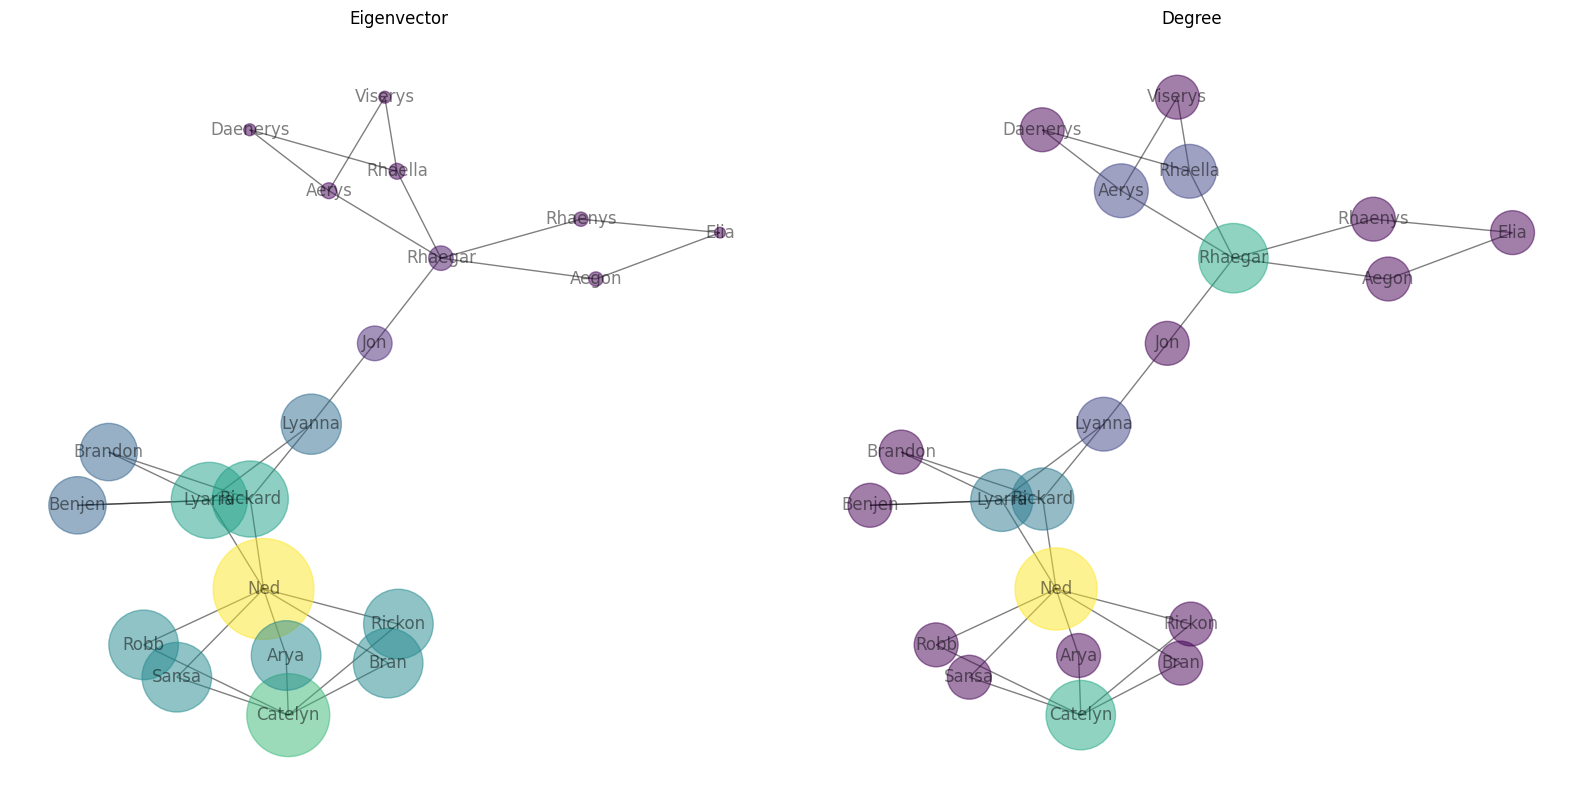

In [49]:
eig_sizes = np.array([eig_centralidades[n] for n in G])

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
nx.draw_kamada_kawai(G, node_size=10000*eig_sizes,
                     node_color=eig_sizes, with_labels=True, alpha=0.5)
plt.title("Eigenvector")

plt.subplot(1, 2, 2)
nx.draw_kamada_kawai(G, node_size=10000*deg_sizes,
                     node_color=deg_colors, with_labels=True, alpha=0.5)
plt.title("Degree")

plt.tight_layout()
plt.show()

## Ejemplo 2


La siguiente es una red de colaboración en la cual los nodos representan investigadores y están unidos mediante una arista si son coautores en un mismo trabajo.


Vamos a omitir las dos primeras filas y el encabezado.


Definamos las aristas y obtengamos la red.


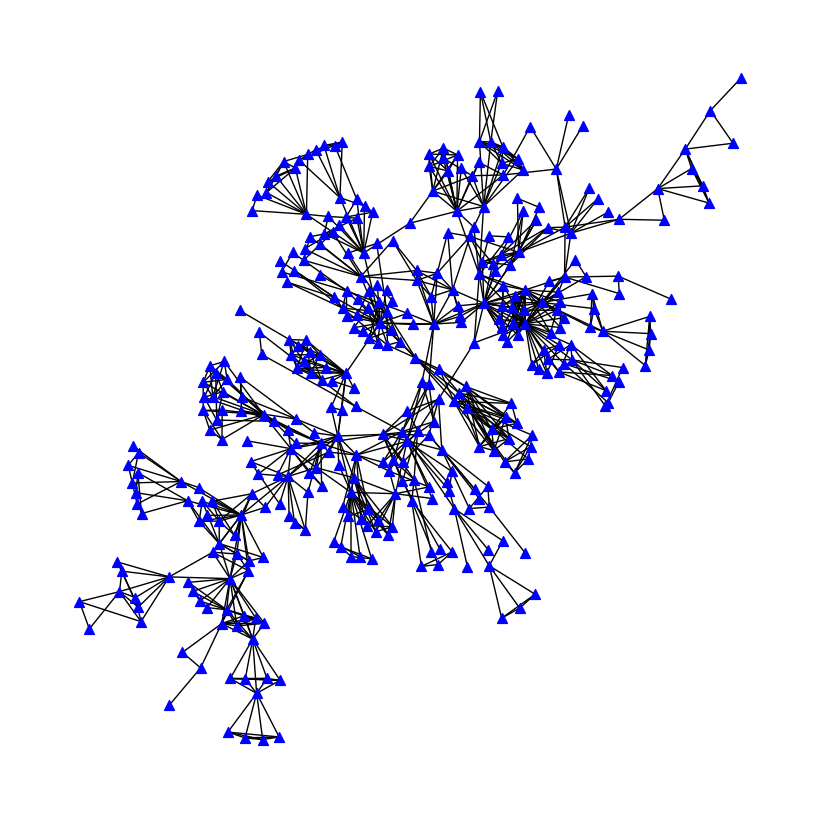

In [50]:
datos = pd.read_csv('data/ca-netscience.mtx', skiprows=2, header=None, sep=' ')
aristas = datos[[0, 1]].values

G1 = nx.Graph()
G1.add_edges_from(aristas)

plt.figure(figsize=[8, 8])
layout = nx.kamada_kawai_layout(G1)
nx.draw(G1, layout, node_size=50, node_color='b', node_shape='^')

Visualicemos la matriz de adyacencia.


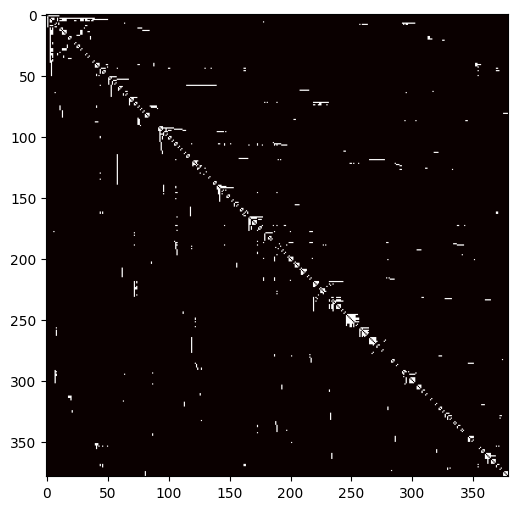

In [51]:
plt.figure(figsize=[6, 6])

A = nx.to_numpy_array(G1)
plt.imshow(A, 'hot')

Obtengamos las centralidades de grado para después ordenarlas.


In [52]:
deg_centralidades_CA = nx.degree_centrality(G1)

dict(sorted(deg_centralidades_CA.items(),
     key=lambda item: item[1], reverse=True))

{np.int64(4): 0.08994708994708994,
 np.int64(5): 0.07142857142857142,
 np.int64(26): 0.07142857142857142,
 np.int64(16): 0.05555555555555555,
 np.int64(67): 0.05026455026455026,
 np.int64(70): 0.047619047619047616,
 np.int64(95): 0.04497354497354497,
 np.int64(15): 0.042328042328042326,
 np.int64(113): 0.03968253968253968,
 np.int64(51): 0.03968253968253968,
 np.int64(32): 0.03968253968253968,
 np.int64(201): 0.037037037037037035,
 np.int64(231): 0.037037037037037035,
 np.int64(52): 0.037037037037037035,
 np.int64(169): 0.037037037037037035,
 np.int64(131): 0.031746031746031744,
 np.int64(8): 0.031746031746031744,
 np.int64(21): 0.031746031746031744,
 np.int64(42): 0.031746031746031744,
 np.int64(170): 0.031746031746031744,
 np.int64(100): 0.031746031746031744,
 np.int64(214): 0.031746031746031744,
 np.int64(303): 0.031746031746031744,
 np.int64(23): 0.0291005291005291,
 np.int64(33): 0.0291005291005291,
 np.int64(85): 0.0291005291005291,
 np.int64(86): 0.0291005291005291,
 np.int64(88

Hagamos lo mismo con la centralidad de eigenvector.


In [53]:
eig_centralidades_CA = nx.eigenvector_centrality(G1)

dict(sorted(eig_centralidades_CA.items(),
     key=lambda item: item[1], reverse=True))

{np.int64(4): 0.4142986919485969,
 np.int64(5): 0.35620760980918204,
 np.int64(16): 0.34644984317573335,
 np.int64(15): 0.255742520988079,
 np.int64(45): 0.23695415610583823,
 np.int64(46): 0.21824435098376588,
 np.int64(47): 0.21824435098376588,
 np.int64(176): 0.21824435098376588,
 np.int64(177): 0.21824435098376588,
 np.int64(250): 0.1470501642695783,
 np.int64(1): 0.1391155222468906,
 np.int64(313): 0.13482071886308813,
 np.int64(314): 0.13482071886308813,
 np.int64(13): 0.1209779840445493,
 np.int64(373): 0.11588767102343436,
 np.int64(14): 0.10963067485617453,
 np.int64(249): 0.10765364730272699,
 np.int64(323): 0.1064163626498334,
 np.int64(324): 0.1064163626498334,
 np.int64(44): 0.08855221930373537,
 np.int64(374): 0.08543178074881773,
 np.int64(153): 0.08114250097956824,
 np.int64(154): 0.08114250097956824,
 np.int64(201): 0.07531454886541988,
 np.int64(371): 0.0733218873978713,
 np.int64(231): 0.06554228055505548,
 np.int64(128): 0.06185830232960769,
 np.int64(236): 0.061582

Notemos que hay cambios en las posiciones respecto a ambas centralidades. El nodo 1, por ejemplo, de estar en el lugar 29 con la centralidad de grado, pasa a ser el lugar 11 con la centralidad de eigenvector. ¿Tiene sentido? Para ello habría que localizar a los vecinos del nodo 1 y ver sus centralidades (la teoría dice que tienen centralidad alta también).



# Actividad

Extrae los nodos con mayor cambio de centralidades (al menos 10 lugares), extrae las centralidades de sus vecinos y explica el por qué del cambio.


Vamos a visualizar la red tomando en cuenta las centralidades para ver en dónde están ubicados los nodos más centrales.


In [54]:
deg_centralidades = nx.degree_centrality(G1)
eig_centralidades = nx.eigenvector_centrality(G1)

deg_colors = np.array([deg_centralidades[n] for n in G1])
eig_sizes = np.array([eig_centralidades[n] for n in G1])

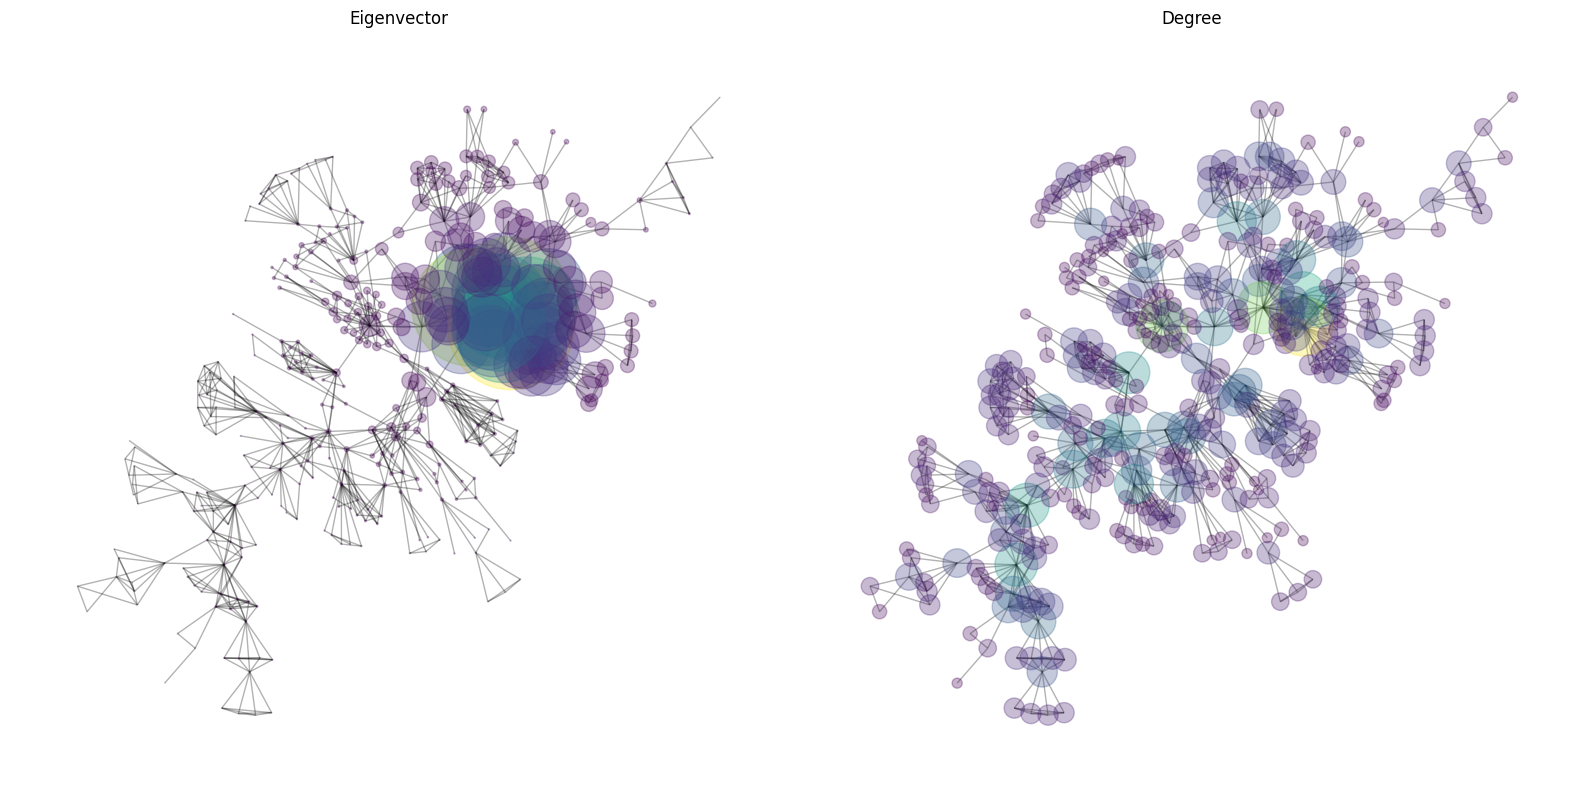

In [55]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
nx.draw_kamada_kawai(G1, node_size=20000*eig_sizes,
                     node_color=eig_sizes, with_labels=False, alpha=0.3)
plt.title("Eigenvector")

plt.subplot(1, 2, 2)
nx.draw_kamada_kawai(G1, node_size=20000*deg_colors,
                     node_color=deg_colors, with_labels=False, alpha=0.3)
plt.title("Degree")

plt.tight_layout()
plt.show()

## $\text{degree} - \text{eigenvector}$


Conseguimos las diferencias de $\text{degree} - \text{eigenvector}$, nos quedamos con las mas positivas, las mas negativas, las mas cercanas a 0 y las mas alejadas.

In [56]:
# top diferencias

diff = {n: (deg_centralidades[n] - eig_centralidades[n]) for n in G1.nodes()}
k = 10

top_pos = [n for n, v in sorted(
    diff.items(), key=lambda kv: kv[1], reverse=True)[:k]]

top_neg = [n for n, v in sorted(diff.items(), key=lambda kv: kv[1])[:k]]

closest0 = [n for n, v in sorted(diff.items(), key=lambda kv: abs(kv[1]))[:k]]

furthest = [n for n, v in sorted(diff.items(), key=lambda kv: abs(kv[1]), reverse=True)[:k]]

In [57]:
# plot centralidades

def plot_centralidades(top_pos, title: str = '', nodesize=10000):
    top_pos_eig = np.array([eig_centralidades[n] for n in top_pos])
    top_pos_deg = np.array([deg_centralidades[n] for n in top_pos])
    top_pos_diff = np.array([diff[n] for n in top_pos])

    plt.figure(figsize=(24, 8))
    pos = nx.kamada_kawai_layout(G1)

    plt.subplot(1, 3, 2)
    nx.draw_networkx_edges(G1, pos, alpha=0.15, width=1.0)
    nx.draw_networkx_nodes(G1, pos, nodelist=top_pos, node_size=nodesize*top_pos_eig,
                           node_color=top_pos_eig, alpha=0.6)
    nx.draw_networkx_labels(
        G1, pos, labels={n: n for n in top_pos}, font_size=10)
    plt.title("Eigenvector")
    plt.axis("off")

    plt.subplot(1, 3, 1)
    nx.draw_networkx_edges(G1, pos, alpha=0.15, width=1.0)
    nx.draw_networkx_nodes(G1, pos, nodelist=top_pos, node_size=nodesize*top_pos_deg,
                           node_color=top_pos_deg, alpha=0.6)
    nx.draw_networkx_labels(
        G1, pos, labels={n: n for n in top_pos}, font_size=10)
    plt.title("Degree")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    nx.draw_networkx_edges(G1, pos, alpha=0.15, width=1.0)
    nx.draw_networkx_nodes(G1, pos, nodelist=top_pos, node_size=nodesize*np.abs(top_pos_diff),
                           node_color=top_pos_diff, alpha=0.6)
    nx.draw_networkx_labels(
        G1, pos, labels={n: n for n in top_pos}, font_size=10)
    plt.title("Diff")
    plt.axis("off")

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

In [58]:
# tabla

def tabla(top_pos, digits):
    df = (
        pd.DataFrame({
            "node": top_pos,
            "degree": [deg_centralidades[n] for n in top_pos],
            "eigenvector": [eig_centralidades[n] for n in top_pos],
            "diff": [diff[n] for n in top_pos],
        })
        .reset_index(drop=True)
    )

    display(
        df.style.format(
            {
                "eigenvector": f"{{:.{digits}f}}",
                "degree": f"{{:.{digits}f}}",
                "diff": f"{{:.{digits}f}}",
            }
        )
    )
    return df

In [59]:
# vecinos

import matplotlib

def ego_layers(G, center, max_radius):
    layers = []
    prev = set()
    for r in range(0, max_radius + 1):
        nodes_r = set(nx.ego_graph(G, center, radius=r).nodes())
        layers.append(nodes_r - prev)  # exactly distance r
        prev = nodes_r
    return layers  # [L0, L1, ..., Lmax]


def layer_color_map(layers, cmap_name="Reds", stops=None, default="lightgray"):
    # stops: list of floats in [0,1] for each layer (0..R). Higher => darker in Reds.
    if stops is None:
        # for radius 3: [dark, ..., light]
        stops = np.linspace(0.95, 0.35, num=len(layers))

    cmap = matplotlib.colormaps[cmap_name]
    layer_to_color = {i: cmap(stops[i]) for i in range(len(layers))}

    node_to_layer = {}
    for i, L in enumerate(layers):
        for n in L:
            node_to_layer[n] = i

    def colors_for(subG):
        cols = []
        for n in subG.nodes():
            i = node_to_layer.get(n, None)
            cols.append(
                layer_to_color[i] if i is not None else mcolors.to_rgba(default))
        return cols

    return colors_for


def plot_ego_radii_3panel(G, center, radii=(1, 2, 3), layout="kamada_kawai", figsize=(18, 6)):
    max_r = max(radii)
    layers = ego_layers(G, center, max_r)
    colors_for = layer_color_map(layers, cmap_name="Reds")

    plt.figure(figsize=figsize)
    for i, r in enumerate(radii, start=1):
        SG = nx.ego_graph(G, center, radius=r)

        plt.subplot(1, 3, i)
        if layout == "circular":
            pos = nx.circular_layout(SG)
            nx.draw(SG, pos, node_color=colors_for(
                SG), with_labels=True, font_size=8)
        else:
            nx.draw_kamada_kawai(SG, node_color=colors_for(
                SG), with_labels=True, font_size=8)

        plt.title(f"Nodo {center} (radio={r})")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# - Chat

# Top positivos

In [60]:
df_top_pos = tabla(top_pos=top_pos, digits=4)

,node,degree,eigenvector,diff
0,26,0.0714,0.0115,0.0599
1,67,0.0503,0.0001,0.0502
2,70,0.0476,0.0001,0.0475
3,95,0.0450,0.0015,0.0435
4,32,0.0397,0.0002,0.0395
5,51,0.0397,0.0005,0.0391
6,169,0.0370,0.0001,0.0369
7,52,0.0370,0.0004,0.0367
8,214,0.0317,0.0001,0.0317
9,42,0.0317,0.0001,0.0317


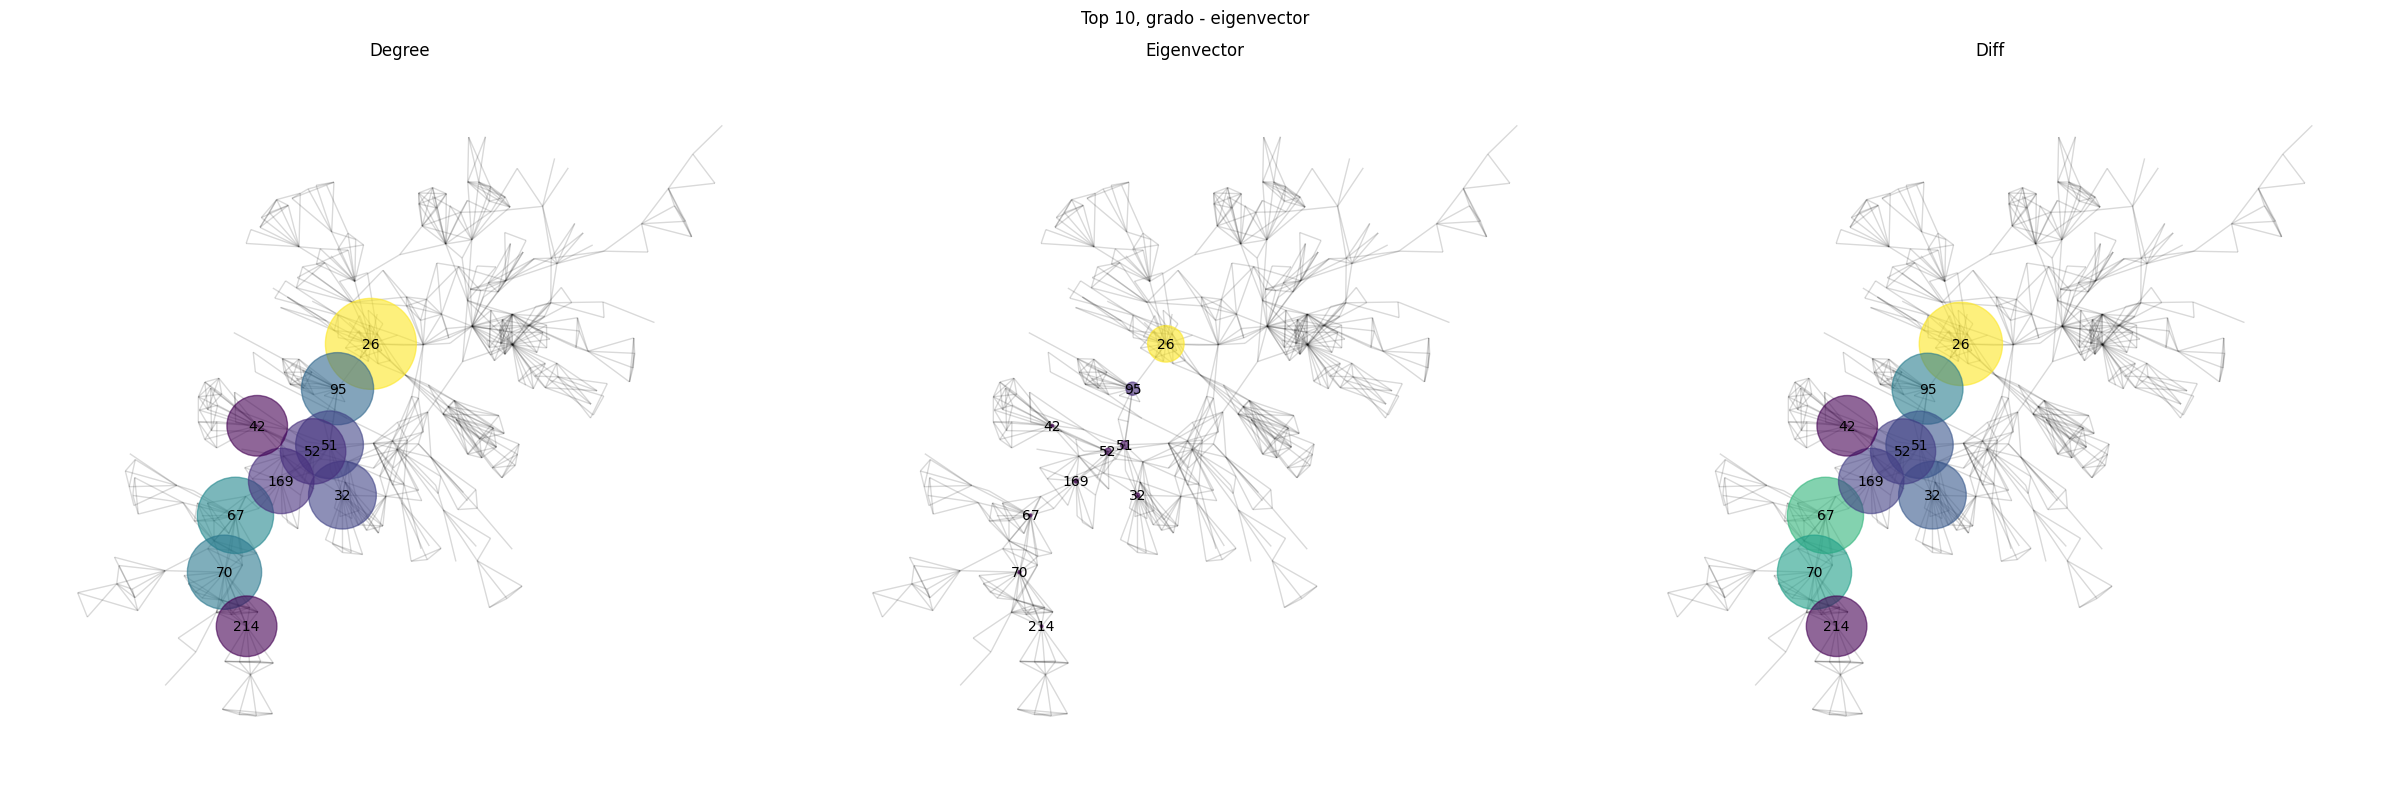

In [61]:
plot_centralidades(
    top_pos=top_pos, title='Top 10, grado - eigenvector', nodesize=60000)

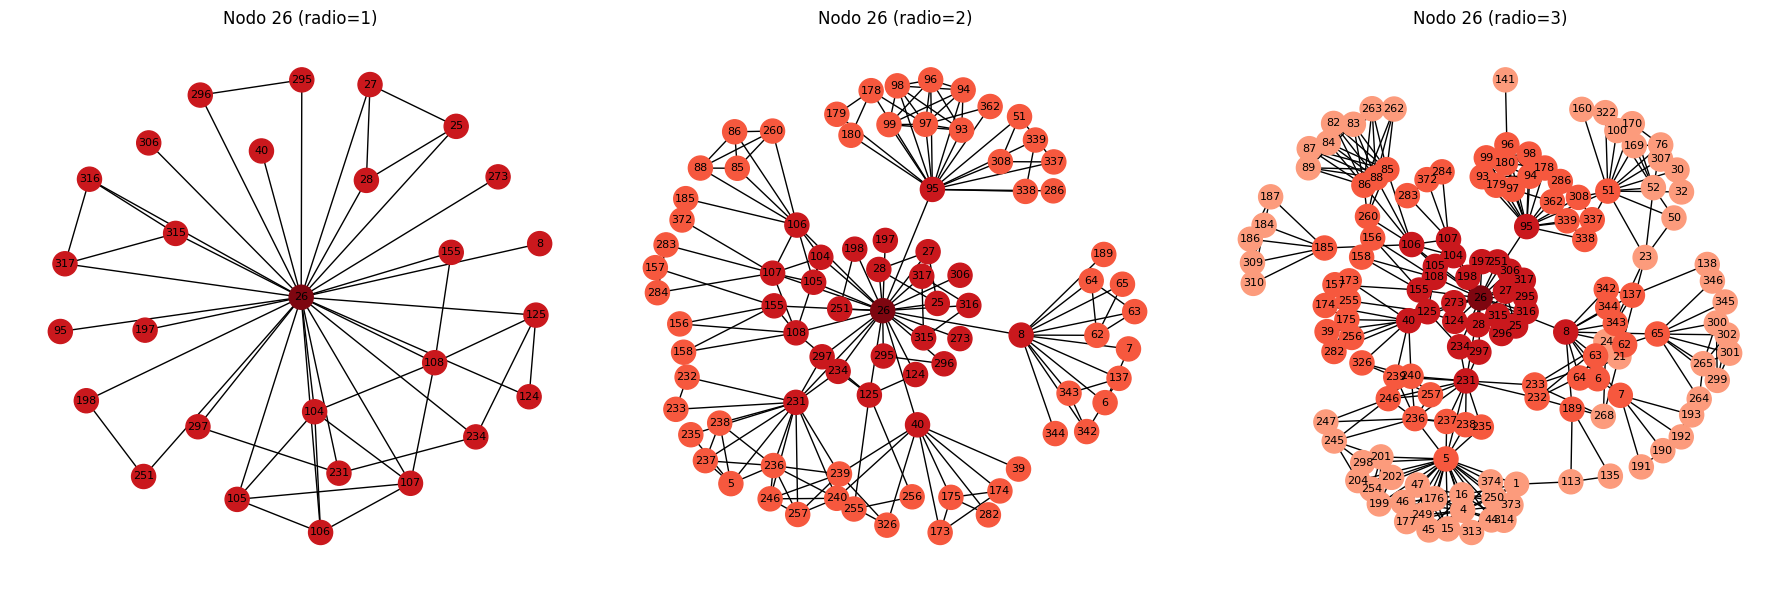

In [62]:
maxpos_node, maxpos_val = max(diff.items(), key=lambda kv: kv[1])
plot_ego_radii_3panel(G1, maxpos_node, radii=(1, 2, 3), layout="kamada_kawai")

# Top Negativos

In [63]:
df_top_neg = tabla(top_pos=top_neg, digits=4)

,node,degree,eigenvector,diff
0,4,0.0899,0.4143,-0.3244
1,16,0.0556,0.3464,-0.2909
2,5,0.0714,0.3562,-0.2848
3,15,0.0423,0.2557,-0.2134
4,45,0.0265,0.2370,-0.2105
5,46,0.0212,0.2182,-0.1971
6,47,0.0212,0.2182,-0.1971
7,176,0.0212,0.2182,-0.1971
8,177,0.0212,0.2182,-0.1971
9,250,0.0159,0.1471,-0.1312


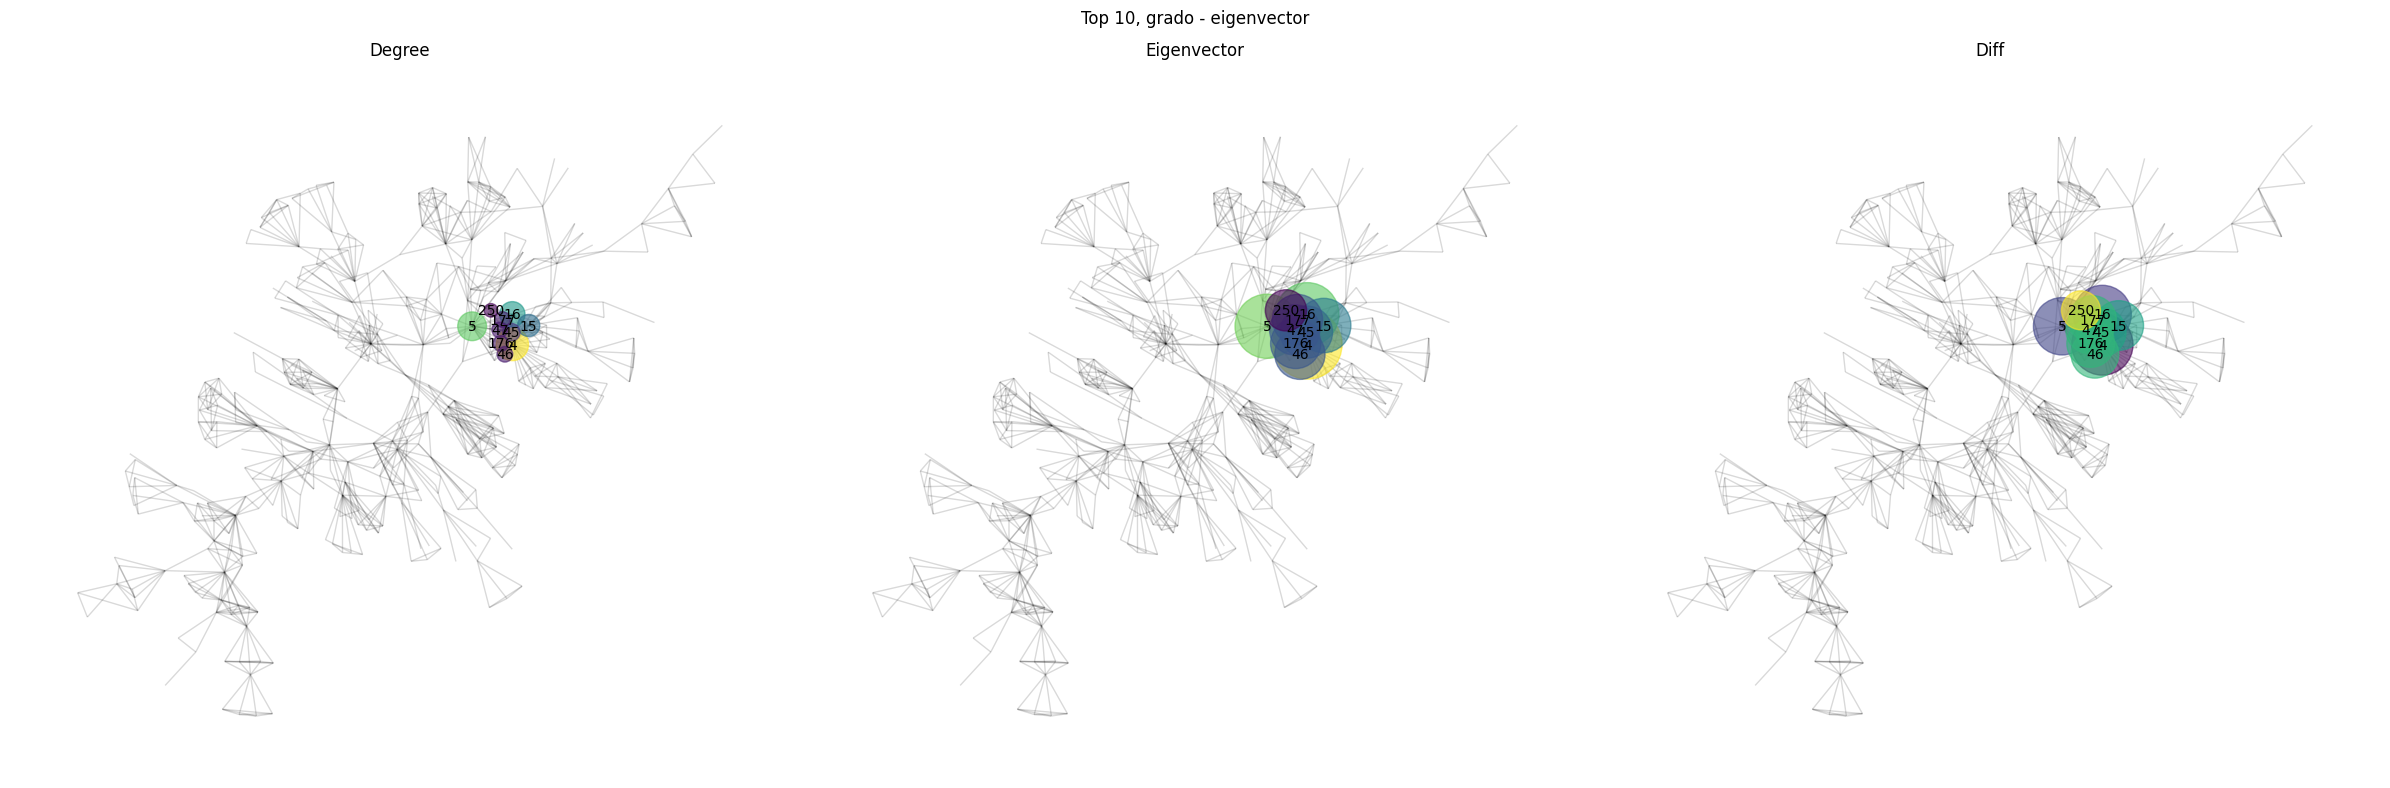

In [64]:
plot_centralidades(
    top_pos=top_neg, title='Top 10, grado - eigenvector', nodesize=6000)

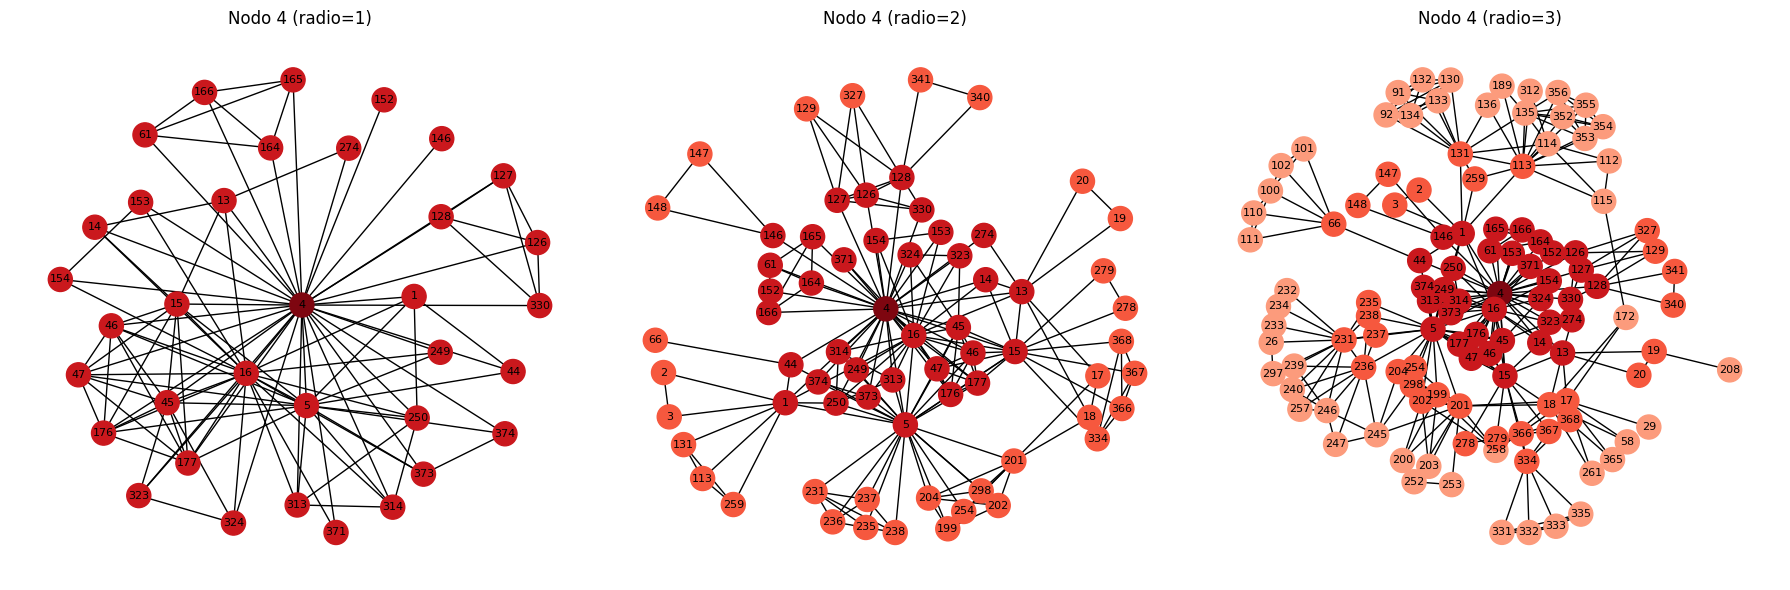

In [65]:
maxneg_node, maxneg_val = min(diff.items(), key=lambda kv: kv[1])
plot_ego_radii_3panel(G1, maxneg_node, radii=(1, 2, 3), layout="kamada_kawai")

# Top cercanos a 0

Los nodos que tienen la menor diferencia es porque es parecido cuanto pesan sus conexiones a la calidad de los nodos a los que estan conectados. Son parecidos a una red conexa, en una red conexa la diferencia de las centralidades ponderadas es 0

Justo en sus vecinos a radio = 1, se forma un $K_3$; mientras mas avanza el radio mas se va perdiendo la red completamente conexa, pero esa es la idea. En la red que estamos usando, este es el cluster mas parecido a una red completamente conexa, como un grupo de amigos que son muy amigos entre ellos.

![image.png](attachment:image.png)


In [66]:
df_closest0 = tabla(top_pos=closest0, digits=4)

,node,degree,eigenvector,diff
0,29,0.0026,0.0025,0.0002
1,239,0.0185,0.0188,-0.0002
2,240,0.0185,0.0188,-0.0002
3,234,0.0079,0.0076,0.0003
4,261,0.0053,0.0050,0.0003
5,365,0.0053,0.0050,0.0003
6,147,0.0053,0.0043,0.0009
7,148,0.0053,0.0043,0.0009
8,136,0.0053,0.0042,0.0011
9,340,0.0053,0.0066,-0.0013


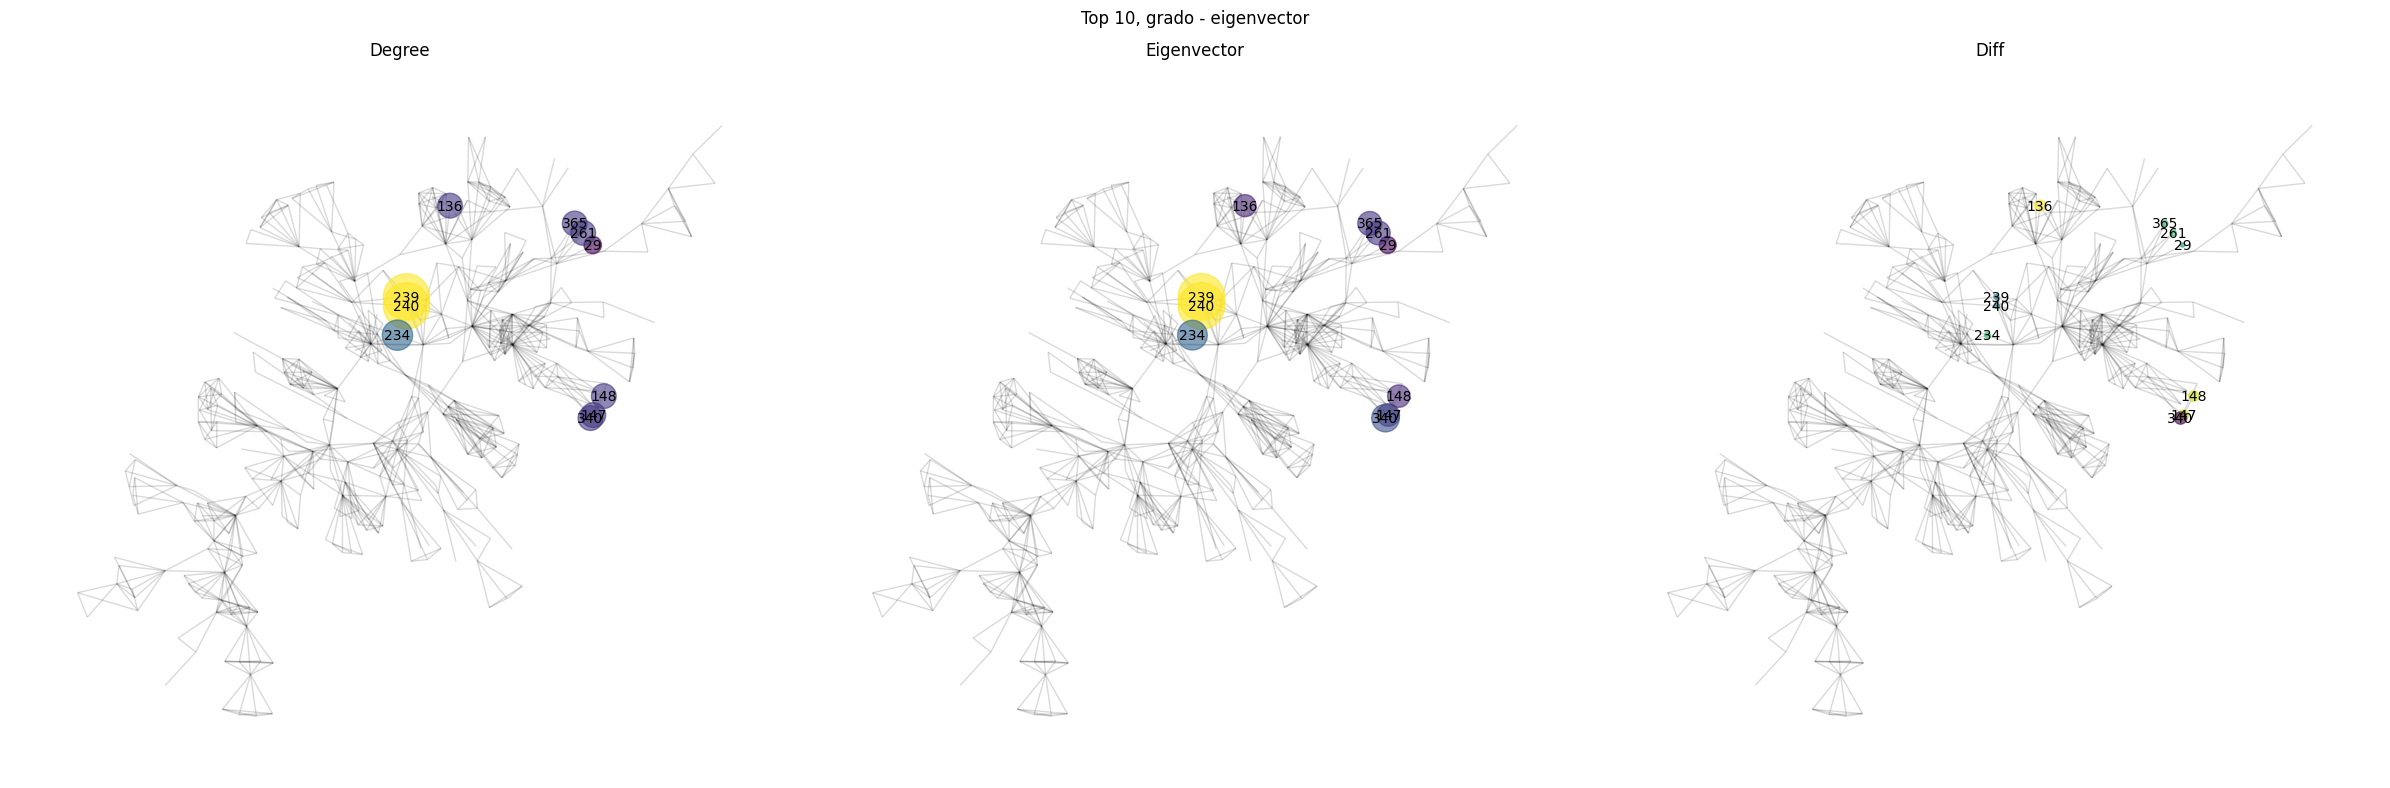

In [67]:
plot_centralidades(
    top_pos=closest0, title='Top 10, grado - eigenvector', nodesize=60000)

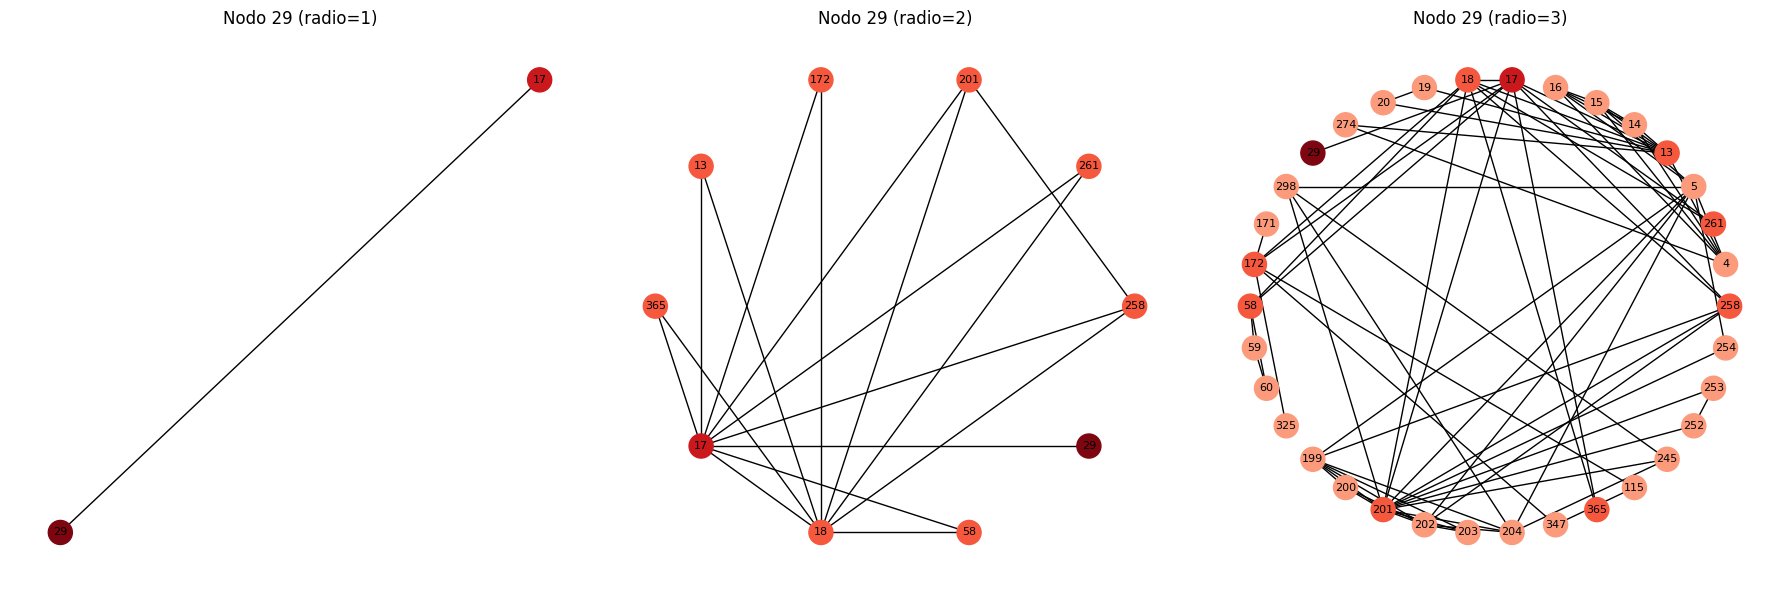

In [68]:
closest_node, closest_val = min(diff.items(), key=lambda kv: abs(kv[1]))
plot_ego_radii_3panel(G1, closest_node, radii=(1, 2, 3), layout="circular")

# Top alejados

Los que tienen la diferencia mas grande, es porque estan conectados a otros de los nodos mas importantes de la red y tienen pocas conexiones. JAJA como Hugo, que es amigo de Steve Jobs, Elon Musk y Bill Gates o no me acuerdo quien era el ultimo,
-Steve Jobs- ya no.


In [69]:
df_furthest = tabla(top_pos=furthest, digits=4)

,node,degree,eigenvector,diff
0,4,0.0899,0.4143,-0.3244
1,16,0.0556,0.3464,-0.2909
2,5,0.0714,0.3562,-0.2848
3,15,0.0423,0.2557,-0.2134
4,45,0.0265,0.2370,-0.2105
5,46,0.0212,0.2182,-0.1971
6,47,0.0212,0.2182,-0.1971
7,176,0.0212,0.2182,-0.1971
8,177,0.0212,0.2182,-0.1971
9,250,0.0159,0.1471,-0.1312
